In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np
import json
import itertools
from scipy.interpolate import griddata
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

In [80]:
class Landscape():
    def __init__(self, num_dimensions, dimension_size, num_grid_res = 7):
        self.num_dims = num_dimensions
        self.dim_size = dimension_size
        self.num_grid_res = num_grid_res
        self.chosen_points = self.gen_chosen_points()
        self.fitness_grid = self.gen_landscape()
        
    def gen_chosen_points(self):
        k = complex(0,self.num_grid_res)
        grid_x, grid_y = np.mgrid[0:self.dim_size:k, 0:self.dim_size:k]
        return np.vstack((grid_x.ravel(),grid_y.ravel())).T
    
    def uniform_rand_fit_assign(self, min=1, max=100):
        num_rand_points = self.chosen_points.shape[0]
        rand_fitness_array = np.random.random_integers(min, max, num_rand_points)
        return rand_fitness_array
    
    def gen_landscape(self):
        rand_fitness_array = self.uniform_rand_fit_assign()
        grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        return griddata(self.chosen_points, rand_fitness_array, (grid_x, grid_y), method='cubic')

    def draw_2d_in_3d(self, elevation_deg = 80, rotation_deg = 0):
        grid_x, grid_y = np.mgrid[0:self.dim_size, 0:self.dim_size]
        fig=p.figure()
        ax = p3.Axes3D(fig)
        #ax.plot_wireframe(grid_x,grid_y,self.fitness_grid, color = 'black')
        ax.contour3D(grid_x,grid_y,self.fitness_grid,50,cmap=plt.cm.viridis)
        ax.set_xlabel('loci_0')
        ax.set_ylabel('loci_1')
        ax.set_zlabel('Fitness')
        ax.view_init(elevation_deg, rotation_deg)
        p.show()
        
    def draw_2d(self):
        plt.plot(self.chosen_points[:,0], self.chosen_points[:,1], 'k.', ms=10)
        plt.imshow(self.fitness_grid.T, extent=(0,self.dim_size,0,self.dim_size), origin='lower')
        plt.title('Cubic')
        plt.gcf().set_size_inches(10, 10)
        plt.show()
        
    def draw_2d_sea(self):
        grid_x, grid_y = range(self.dim_size), range(self.dim_size)
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_trisurf(grid_x,grid_y,self.fitness_grid, cmap=plt.cm.viridis, linewidth=0.2)
        plt.show()

In [81]:
earth = Landscape(2, 500, 5)

/home/huawei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: This function is deprecated. Please call randint(1, 100 + 1) instead
  app.launch_new_instance()


67.28405981405102


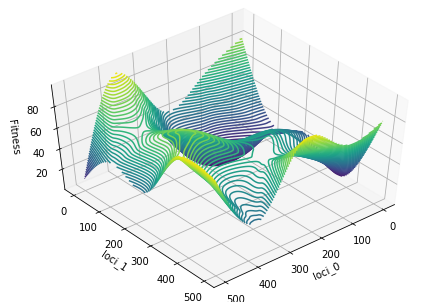

In [82]:
print(earth.fitness_grid[100,0])
earth.draw_2d_in_3d(elevation_deg=50, rotation_deg=50)